**Project Start Date** <br>
17th December 2020 <br>
Time to Run: <br>

**Data Sources** <br>
https://www.kaggle.com/usaf/world-war-ii/notebooks <br> 
https://www.kaggle.com/smid80/weatherww2/data <br>

**Background** <br>
Aerial Bombing Operations in WW2 - Bombing operations data <br>

This dataset consists of digitized paper mission reports from WWII. Each record includes the date, conflict, geographic location, and other data elements to form a live-action sequence of air warfare from 1939 to 1945. The records include U.S. and Royal Air Force data, in addition to some Australian, New Zealand and South African air force missions.

Weather Conditions in WW2 (Weather Stations / Weather Conditions) <br>
The dataset contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunder storms or other poor weather conditions.

**Aim of this project** <br>
Use Sweetviz - A powerful package to speed up EDA, saving reports as HTML files and with the ability to compare test and train datasets 
Impletment the use of Ridge Plots as part of EDA to understand variabe distribution analysis 
One method of Outlier Detection & Analysis
Implement a regularised regression models that predicts the maximum weather temperature (based on the minimum temperature)
Test Assumptions of Regularised & Residual Analysis: Correlation of errors with predictor variables
Dockerise the notebook


**Analysis regarding Data Quality** <br>
Understanding of the sampling procedure 
- Since our project team did not participate in planning the study or data collection, it is possible that we are missing crucial context which could render our conclusions invalid. <br>

**Potential biases** <br> 
Real-world actions that generated the data you inherited <br>
Standardisation of binary variables - Sometimes this does not make any sense. The values are arbitrary; they don't mean anything in and of themselves. Firstly decide if the MEAN of these binary data is meaningful? <br>

**Objectives & Hypothesises to Test (max. 10)** <br>
<u>Exploratory Analysis</u>
- High level discriptive statistics
- Do any values look to be recorded to accommodate missing values? e.g. 999, 9999 etc.
- Assessment of feature distributions & Scaling required 
    - Keep in mind that normalizing the inputs is generally a good idea in every type of regression
- Assessment of outliers and treatment
- Assessment of feature relationships
    - What defines the feature 'poor weather' conditions?
    - Is there a relationship between the daily minimum and maximum temperature (TimeSeries Analysis)?
    - It is expected that average temperatures are colder in winter months than summer months
    - It is expected that more snowfall occurs in the winter months (for northern hemisphere regions)
    - It is expected that more Precipitation occurs in the winter months (for northern hemisphere)
    - It is expected that lower temperatures correlate with higher snowfall and precipation
    - It is expected that higher levels above the sea have greater precipation 
    - It is expected that the accuracy of recordings based on stations may not be uniform (outlier detection)
    - Explore the meaning of 'PoorWeather'
<br>

**Statistical Model/Machine Learning Applications** <br>
<br>
<u>Model Development Process</u>
- Not advised to normalise the intercept
- Create a Baseline (dummy) model (Predict the average maximum temperature)
- Explain the train/test split
- Application of Cross Validation
- Predict the maximum temperature given the minimum temperature (Regularised Models)
- Feature Selection/Importance (implicity given as the output of the model)
- Explain appropriate error metric
- Explain what features are developed and transformations applied
- Explain if the model is exhibiting high bias or high variance and how this can be improved
    - Plot learning curves to deduce high bias/high variance and conclude what means could be applied to solve these issues

**Additional Learning notes post project and key new methods** <br> 
- New Methods Used
    - Sweetviz for automated EDA and compare train and test set data sets
    - Ridge plots for EDA
    - Feature engineering for date features (time from xxx date)
    - Bivariate Combinations: Determine the most useful predictor variable interactions
    - Determine optimal polynominal degree
    - Assumptions testing for OLS and confirmation that r-sq can be negative
    - Learning Curves: How to decide on how the model could be approved and if enough data has been included in model development

**Next steps** <br>
- Analysis of influencial data points
- Return p_value, std_err for the model results 
- Feature importance & accompanying visualisation (above analysis of the model coefficients sklearn BestK for details)
- Incorporate the aerial_bombing_data into the model
- Use sine and cosine to implement seasonal features
- Use latitude and longitude to impute "eval" rather than removing respective rows (similarity to impute values)
- Assess is using the fahrenheit variable as the target improves model performance 
- Geo-Spatial Data Features (Latitude & Longitude): Converting geolocation data into zones
- Drop the intercept: One important issue in case of both ridge and lasso regression is intercept handling. Generally, regularizing the intercept is not a good idea and it should be left out of regularization
- Add graphs for ridge and lasso regression model results
- Optimise for the alpha parameter across a range of value using something like grid search
- Complete section 'Data Coherent Checks'
- Deal with count data by creating binned categories (ELEV)
- Use stats.models to implement regression models (in replacement of sklearn)

**References** <br>
Exploratory Data Analysis <br>
https://towardsdatascience.com/powerful-eda-exploratory-data-analysis-in-just-two-lines-of-code-using-sweetviz-6c943d32f34 <br>
https://medium.com/analytics-vidhya/how-to-plot-data-on-a-world-map-in-python-25cf9733c3dd <br>
https://towardsdatascience.com/pandas-profiling-sweetviz-8849704cadd7 <br>
https://towardsdatascience.com/ridgeline-plots-the-perfect-way-to-visualize-data-distributions-with-python-de99a5493052 <br>
https://towardsdatascience.com/all-you-want-to-know-about-preprocessing-data-preparation-b6c2866071d4 <br>

Feature Engineering <br>
https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159 <br>
https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca <br>
https://medium.com/@khadijamahanga/using-latitude-and-longitude-data-in-my-machine-learning-problem-541e2651e08c <br>
https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

Model Development <br>
https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/ <br>
https://towardsdatascience.com/feature-engineering-combination-polynomial-features-3caa4c77a755 <br>
https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386 <br>
https://www.dataquest.io/blog/learning-curves-machine-learning/ <br>
https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Folders
import os
import sys


# Data Wrangling
import math
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import statistics
from scipy import stats
import calendar
import datetime as dt
from itertools import combinations

# Data Exploration and Visualisation
import seaborn as sns
# !{sys.executable} -m pip install sweetviz
import sweetviz as sv
# !{sys.executable} -m pip install joypy
import joypy
from joypy import joyplot
from pandas.api.types import CategoricalDtype
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot

# Model Development
import scipy
import statsmodels.api as sm
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve

# Data Export
import pickle


Bad key text.latex.unicode in file /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key nbagg.transparent in file /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 426 ('nbagg.transparent: True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotli

In [2]:
start_time = dt.time()

In [3]:
os.getcwd()

'/Users/Rej1992/Documents/GitHub/RegressionModels/notebooks'

In [4]:
aerial_bombing_data = pd.read_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/01_raw/ww2_boming_operations.csv')
weather_summary = pd.read_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/01_raw/WeatherTempPrediction.csv')
weather_station_location = pd.read_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/01_raw/WeatherStationLocations.csv')

data_list = []
data_list.append(aerial_bombing_data)
data_list.append(weather_summary)
data_list.append(weather_station_location)

In [5]:
# State the assumptions you’re being forced to make.
# Write up caveat notes to be included in the appendix of your final report
# Write cautionary notes that warn the decision-maker (and your other readers) that conclusions from the study will 
# need to be downgraded due to potential data issues

In [6]:
for i in data_list:
    print("Dataframe Dimensions")
    print(i.shape)
    print("")

    print("Dataframe Columns and respective types")
    print(i.dtypes)
    print("")

    print("Percentage of Missing Data")
    print(i.isnull().sum() * 100 / len(i))
    
    print("")

Dataframe Dimensions
(178281, 46)

Dataframe Columns and respective types
Mission ID                                 int64
Mission Date                              object
Theater of Operations                     object
Country                                   object
Air Force                                 object
Unit ID                                   object
Aircraft Series                           object
Callsign                                  object
Mission Type                              object
Takeoff Base                              object
Takeoff Location                          object
Takeoff Latitude                          object
Takeoff Longitude                        float64
Target ID                                 object
Target Country                            object
Target City                               object
Target Type                               object
Target Industry                           object
Target Priority                           ob

## Data Analysis

In [7]:
# Investiage options to link the dataframes with a unique key: weather_summary and weather_station_location look to be 
# connected via STA and WBAN respectively 
def uncommon_elements(list1, list2):
    ## Add something clever so the look up is always against the set with the largest number of unique records
    #list2 = max(len(list1), len(list(2)))
    
    return [element for element in list2 if element not in list1]

STA = set(weather_summary.STA)
print(len(STA))

WBAN = set(weather_station_location.WBAN)
print(len(WBAN))

print('Sets are of the same data type: ', type(weather_summary.STA) == type(weather_station_location.WBAN))

print('Stations that are uncommon across both sets: ', uncommon_elements(STA, WBAN))

159
161
Sets are of the same data type:  True
Stations that are uncommon across both sets:  [15605, 15604]


In [8]:
combined_data = pd.merge(weather_summary, 
                         weather_station_location, 
                         how = 'inner', # takes care of only keeping records in both sets
                         left_on='STA',
                         right_on='WBAN')

print(len(combined_data))

119040


## Columns for Combined Data
**STA**
- STA: represent the Weather Station
- Not all STA codes represent the same time frequency 
- Object Data Type

**Date** 
- Date has been split into DA MO and YR respectively, note the century has been dropped when recording the YR
- Date Data Type (will require engineering in order to be used for ML

**Precip** 
- Precipitation in mm. This consists of numerical values and 'T' for 16,754 entries. This looks to be a mistake in the data collection (Impute precip == 0 for these cases)
- Numeric (float) Data Type

**MaxTemp and MinTemp** 
- These are features that have been transformed into celcius from fahrenheit readings MAX/MIN and these have been recorded to 6 decimal places. The degrees celcius value has additionally been converted to an average. Using celcius will have a smaller range than the fahrenheit records. Patterns may be more easily seen based fahrenheit columns 
- Numeric (float) Data Type

**MEA** 
- This is the mean for the fahrenheit MAX / MIN columns and this has been rounded to 1 d.p. Drop this columns and calculate the extact mean value
- Numeric (float) Data Type

**Snowfall**
- This looks to be measures in terms of the amount of snow that fell in mm. The units are not obvious so there are two options
- Either assume the units are centiments by attempting to research more about the data OR normalise all the columns so they are on the same scale
- Numeric (float) Data Type

**SNF**
- After research it is unclear what SNF relates too and seems to gave a range of 0 - 3.4 (Agree to remove)
- This supports the necessity to normalise the data for the numeric columns due to the possibility of differing units across columns
- Numeric (float) Data Type

**PRCP**
- This column looks to have been scaled by a factor of 1/25.4*Precip (Agree to remove)
- Numeric (float) Data Type

**TSHDSBRSGF**
- This is a repeat for PoorWeather so can be removed

**WBAN**
- Same as STA, representing the Weather Station
- Not all Weather Stations are located in the USA (unique STATE/COUNTRY ID = 63)
- This will be duplicated due to the merge so can be removed 
- Object Data Type

**NAME**
- This is the name of the weather station. It has a many:1 relationship with State/Country ID i.e. more than one station can be present per country 
- Object Data Type (Nominal)

**STATE/COUNTRY ID**
- This is the location of the weather station at state/country level
- Object Data Type (Nominal)

**LAT**
- This is the decimal latitude in string format 

**LON**
- This is the decimal latitude in string format 

**ELEV**
- Explanation not given - Expected to be level above the sea 
- Note that an elevation of 9999 means unknown
- Numeric (float) Data Type

**Latitude**
- This is the decimal latitude calculated from the LAT/LON provided (use this over string as in format for ML)

**Longitude**
- This is the decimal longitude calculated from the LAT/LON provided (use this over string as in format for ML)

### Data Cleaning - Remove duplicate Rows & Columns
- Remove all columns that exhibit over 90% missing values
- Remove celcius columns 'MaxTemp', 'MinTemp', 'MeanTemp' and 'MEA'
- Remove duplicated/scaled columns: 'PRCP', 'TSHDSBRSGF'
- Remove the primary key to join dataframes SNF & WBAN
- Remove LAT as string format
- Remove LON as string format
- Remove those columns with zero variance
- Remove duplicated rows

In [9]:
# Handling missing data - Remove any columns with over 90% missing data 
def remove_missing_values(data, thresold_limit = 0.9):
    
    return data.loc[:, data.isnull().sum() < thresold_limit*data.shape[0]]

combined_data = remove_missing_values(combined_data)

# Remove additional columns based on explanation above
combined_data.drop(['MaxTemp', 
                    'MinTemp', 
                    'MeanTemp', 
                    'MEA', 
                    'TSHDSBRSGF', 
                    'PRCP', 
                    #'PoorWeather', 
                    'SNF', 
                    'WBAN',
                    'LAT', 
                    'LON'], axis=1, inplace=True)

# Data Quality Expectations: Test for zero variance 
combined_data = combined_data.loc[:, combined_data.apply(pd.Series.nunique) != 1]

# Data Quality Expectations: Duplicated Records
print('Duplicated rows for index: ', combined_data[combined_data.duplicated()].index)
#print(len(combined_data))
combined_data = combined_data.drop_duplicates()
#print(len(combined_data))

Duplicated rows for index:  Int64Index([94660, 94661, 94662, 94663, 94664, 94665, 94666, 94667, 94668,
            94669],
           dtype='int64')


## Data Cleaning
- Understand and update data to correct type
- Check that variables are within a range expected
- Assessment of categorical labels and confirm they are as expected
- Evaluate where missing data exists and how to deal with these fields
    - Do any values look to be recorded to accommodate missing values? e.g. 999, 9999 etc.
- Data represents logical coherence (e.g. underaged cannot hold a driving licence)
- Reformatting: Drop/Rename columns

### Correct Data Types

In [10]:
# Correct Date
def correct_dates(data, cols):
    
    return pd.to_datetime(combined_data[cols], format = '%Y-%m-%d')

# Correct Object Types
def correct_objects(data, cols):
    
    return data[cols].astype('object')

# Correct String Types
def correct_string(data, cols):
    
    return data[cols].astype(str)

combined_data.Date = correct_dates(combined_data, 'Date')

combined_data.STA = correct_objects(combined_data, 'STA')
combined_data.YR = correct_objects(combined_data, 'YR')
combined_data.MO = correct_objects(combined_data, 'MO')
combined_data.DA = correct_objects(combined_data, 'DA')

combined_data.Snowfall = correct_string(combined_data, 'Snowfall')
combined_data.PoorWeather = correct_string(combined_data, 'PoorWeather')

### Imputation of Missing Values

In [11]:
# Deal with Missing/Inaccurate values and correct data types 
def impute_precip_missing_values(data, cols):
    
    return np.where((data[cols] == 'T') | (data[cols] == ' '), 0, data[cols])

def impute_snowfall_missing_values(data, cols):
    
    return np.where((data[cols] == '#VALUE!') | (data[cols] == 'nan'), 0, data[cols])


# Correct float types
def correct_floats(data, cols):
    
    return data[cols].astype('float')

# As the target variable contains 4% missing values remove these to avoid inaccurate assumptions
def remove_missing_max(data):
    
    return data[data.loc[:, 'MAX'].notnull()]

def remove_missing_min(data):
    
    return data[data.loc[:, 'MIN'].notnull()]

combined_data.Precip = impute_precip_missing_values(combined_data, 'Precip')
combined_data.Precip = correct_floats(combined_data, 'Precip')

combined_data.Snowfall = impute_snowfall_missing_values(combined_data, 'Snowfall')
combined_data.Snowfall = correct_floats(combined_data, 'Snowfall')

combined_data = remove_missing_max(combined_data)
combined_data = remove_missing_min(combined_data)

# Verify that the above logic has been correctly applied 
print((combined_data.isnull().sum() * 100) / len(combined_data))

STA                 0.0
Date                0.0
Precip              0.0
Snowfall            0.0
PoorWeather         0.0
YR                  0.0
MO                  0.0
DA                  0.0
MAX                 0.0
MIN                 0.0
NAME                0.0
STATE/COUNTRY ID    0.0
ELEV                0.0
Latitude            0.0
Longitude           0.0
dtype: float64


In [12]:
#Check that variables are within a range expected
analysis_columns = combined_data.columns

for i in analysis_columns:
    print(i)
    print(min(combined_data[i]))
    print(max(combined_data[i]))
    print("""""")

    
## Precip - Contains letters and numeric values: Requires attention & cannot be negative 
## Snowfall - Contains #VALUE! and nan: Requires attention & cannot be negative
## PoorWeather - Contains nan: Requires attention 
## ELEV - Contains 9999 which suggests a comprimise for missing data

## STA - No reason to suggest dubious data
## Date - No reason to suggest dubious data
## YR - No reason to suggest dubious data & cannot be negative
## MO - No reason to suggest dubious data & cannot be negative
## DA - No reason to suggest dubious data & cannot be negative
## MAX - No reason to suggest dubious data
## MIN - No reason to suggest dubious data
## NAME - No reason to suggest dubious data & Categorical Data OK
## STATE/COUNTRY ID - No reason to suggest dubious data & Categorical Data OK
## Latitude - No reason to suggest dubious data
## Longitude - No reason to suggest dubious data

STA
10001
82506

Date
1940-01-01 00:00:00
1945-12-31 00:00:00

Precip
0.0
307.34

Snowfall
0.0
86.36

PoorWeather
0
nan

YR
40
45

MO
1
12

DA
1
31

MAX
-28.0
122.0

MIN
-37.0
94.0

NAME
ABADAN
WILLEMSTAD

STATE/COUNTRY ID
AL
UK

ELEV
1
9999

Latitude
-27.6
67.01666667

Longitude
-175.0
177.3666667



#### Specific Assessment for ELEV

In [13]:
print(round(len(combined_data[combined_data.ELEV == 9999])/len(combined_data)*100,2),'%')

2.96 %


In [14]:
combined_data[combined_data.ELEV == 9999].value_counts("STATE/COUNTRY ID")

STATE/COUNTRY ID
LI    2868
DR     629
TS      13
dtype: int64

In [15]:
combined_data[combined_data.ELEV == 9999].value_counts("NAME")

NAME
MARSHALL/ROBERTS FIELD    1270
CAPE PALMAS                935
FISHERMANS LAKE            663
CIUDAD TRUJILLO            629
EL DJEM                     13
dtype: int64

In [16]:
missing_col_eval = ['MARSHALL/ROBERTS FIELD', 'CAPE PALMAS', 'FISHERMANS LAKE', 'CIUDAD TRUJILLO', 'EL DJEM']

for i in missing_col_eval:
    print(i)
    print(combined_data[combined_data.NAME == i]["ELEV"].unique())
    print("""""")

MARSHALL/ROBERTS FIELD
[9999]

CAPE PALMAS
[9999]

FISHERMANS LAKE
[9999]

CIUDAD TRUJILLO
[9999]

EL DJEM
[9999]



In [17]:
missing_elev = combined_data[combined_data["ELEV"] == 9999]
pd.crosstab(missing_elev.NAME, missing_elev["STATE/COUNTRY ID"])

STATE/COUNTRY ID,DR,LI,TS
NAME,,,
CAPE PALMAS,0,935,0
CIUDAD TRUJILLO,629,0,0
EL DJEM,0,0,13
FISHERMANS LAKE,0,663,0
MARSHALL/ROBERTS FIELD,0,1270,0


In [18]:
# There is no way to impute values for ELEV based on other information available based on STATE or other location factors
## Decision to remove these rows
combined_data = combined_data[combined_data.ELEV != 9999]

### Linear Combination Check

In [19]:
combined_data.corr()

,Precip,Snowfall,MAX,MIN,ELEV,Latitude,Longitude
Precip,1.000000,-0.010155,0.005561,0.089336,-0.035566,-0.100628,0.009412
Snowfall,-0.010155,1.000000,-0.340857,-0.319970,-0.020968,0.208550,-0.031096
MAX,0.005561,-0.340857,1.000000,0.875380,-0.057549,-0.554199,0.044737
MIN,0.089336,-0.319970,0.875380,1.000000,-0.192664,-0.598662,-0.090369
ELEV,-0.035566,-0.020968,-0.057549,-0.192664,1.000000,0.076612,0.058855
Latitude,-0.100628,0.208550,-0.554199,-0.598662,0.076612,1.000000,-0.130017
Longitude,0.009412,-0.031096,0.044737,-0.090369,0.058855,-0.130017,1.000000


<AxesSubplot:>

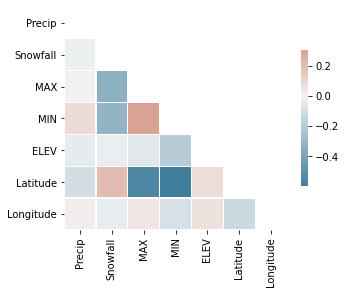

In [20]:
# Compute the correlation matrix
corr = combined_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [21]:
my_report = sv.analyze(combined_data)
my_report.show_html(filepath='/Users/Rej1992/Documents/GitHub/RegressionModels/results/Exploratory_Analysis_Report.html')


Report /Users/Rej1992/Documents/GitHub/RegressionModels/results/Exploratory_Analysis_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Handling nominal and ordinal categorical values
Types: 
- Ordinal: Convert into numeric values retaining the datas natural order [x]
- Nominal: One Hot encoding/Label Encoding [x]
- Dichotomous (Binary): Convert values into indicator values 1/0 [x] <br>
The only columns that require revision at this stage are 'NAME' and 'STATE/COUNTRY ID' [x]

In [22]:
combined_data.select_dtypes('object').columns

Index(['STA', 'PoorWeather', 'YR', 'MO', 'DA', 'NAME', 'STATE/COUNTRY ID'], dtype='object')

In [23]:
def correct_category_datatype(data, cols):
    
    return data[cols].astype('category')

def correct_object_datatype(data, cols):
    
    return data[cols].astype('int')

combined_data.NAME = correct_category_datatype(combined_data, 'NAME')
combined_data['STATE/COUNTRY ID'] = correct_category_datatype(combined_data, 'STATE/COUNTRY ID')

combined_data['YR'] = correct_object_datatype(combined_data, 'YR')
combined_data['MO'] = correct_object_datatype(combined_data, 'MO')
combined_data['DA'] = correct_object_datatype(combined_data, 'DA')

In [24]:
# Pandas `.get_dummies()` method
NAME_dummies_df = pd.get_dummies(combined_data['NAME'])
STATE_dummies_df = pd.get_dummies(combined_data['STATE/COUNTRY ID'])

In [25]:
model_data = pd.concat([combined_data, pd.get_dummies(combined_data['STATE/COUNTRY ID'], prefix='category')],axis=1)

### Outlier Detection
- Univariate Outlier Detection
- It is expected that the accuracy of recordings based on stations may not be uniform (outlier detection)

In [26]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115022 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   STA               115022 non-null  object        
 1   Date              115022 non-null  datetime64[ns]
 2   Precip            115022 non-null  float64       
 3   Snowfall          115022 non-null  float64       
 4   PoorWeather       115022 non-null  object        
 5   YR                115022 non-null  int64         
 6   MO                115022 non-null  int64         
 7   DA                115022 non-null  int64         
 8   MAX               115022 non-null  float64       
 9   MIN               115022 non-null  float64       
 10  NAME              115022 non-null  category      
 11  STATE/COUNTRY ID  115022 non-null  category      
 12  ELEV              115022 non-null  int64         
 13  Latitude          115022 non-null  float64       
 14  Long

In [27]:
outlier_data = combined_data[["Precip", "Snowfall", "MAX", "MIN", "ELEV"]]

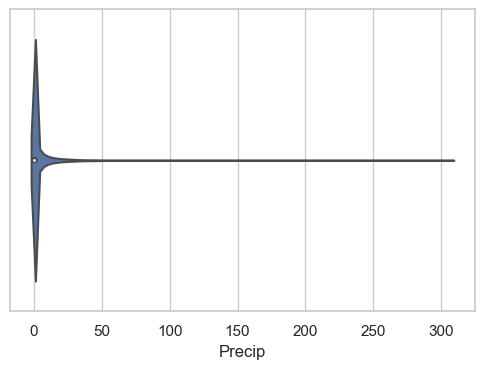

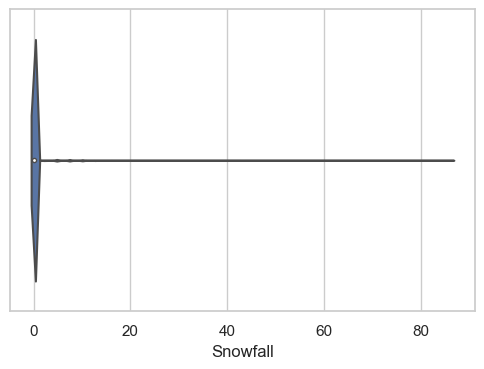

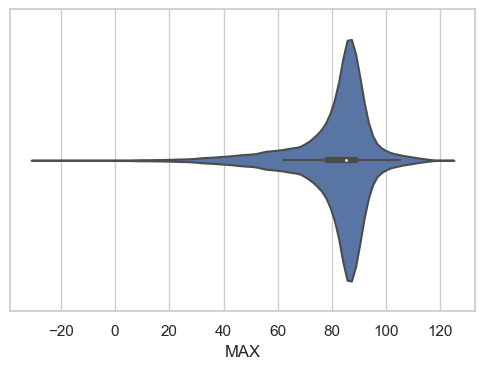

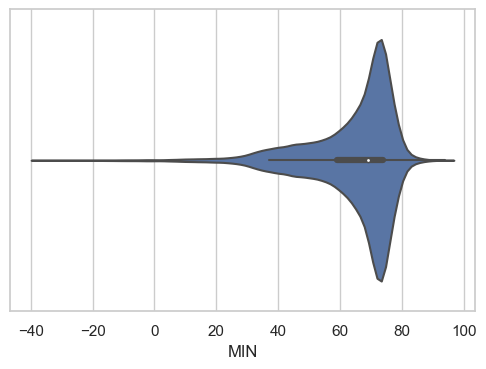

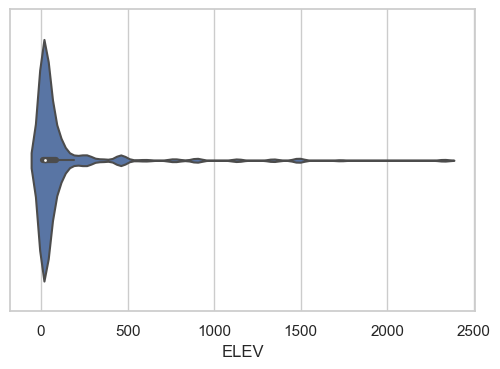

In [28]:
sns.set_theme(style="whitegrid")

for i, col in enumerate(outlier_data.columns):
    plt.figure(i)
    sns.violinplot(x=col, data=outlier_data)

In [29]:
outlier_data["Snowfall"].value_counts()

0.00     112888
5.08        532
2.54        339
7.62        328
10.16       204
12.70        92
20.32        83
17.78        77
15.24        74
22.86        69
25.40        65
27.94        40
30.48        31
45.72        25
50.80        24
48.26        22
35.56        20
33.02        15
60.96        13
66.04        11
38.10        11
43.18        10
53.34        10
63.50         7
55.88         6
40.64         6
76.20         5
58.42         5
81.28         4
78.74         2
73.66         1
68.58         1
83.82         1
86.36         1
Name: Snowfall, dtype: int64

In [30]:
outlier_data.to_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/02_intermediate/outlier_data.csv')

### Exploratory Data Analysis 
**Hypothesis & Expectations to Test**
- Is this a Global study? What are the locations associated with the experiment?
- High level discriptive statistics 
- Assessment of feature distributions
- Assessment of feature relationships
    - What is the relationship of each variable with the target?
<br>

**Is this a Global study? What are the locations associated with the experiment?**

In [31]:
# Categorical data doesn’t have duplicates because of whitespaces, lower/upper cases

In [32]:
combined_data['STATE/COUNTRY ID'].unique()

['GH', 'GY', 'BZ', 'PM', 'CS', ..., 'NG', 'SO', 'AU', 'NH', 'FJ']
Length: 61
Categories (61, object): ['GH', 'GY', 'BZ', 'PM', ..., 'SO', 'AU', 'NH', 'FJ']

In [33]:
combined_data.NAME.unique()

['ACCRA', 'GEORGETOWN', 'CLEVELANDIA', 'BALBOA/ALBROOK', 'REY ISLAND', ..., 'MACKAY', 'ARCHER', 'AMBERLY', 'ROCKHAMPTON', 'BRISBANE']
Length: 152
Categories (152, object): ['ACCRA', 'GEORGETOWN', 'CLEVELANDIA', 'BALBOA/ALBROOK', ..., 'ARCHER', 'AMBERLY', 'ROCKHAMPTON', 'BRISBANE']

In [34]:
pd.crosstab(combined_data['STATE/COUNTRY ID'], combined_data.NAME)

NAME,ABADAN,ACCRA,ADANA,AGRA,AIN EL,AMBERLY,AMENDOLA,AMENDOLA/MU 9,AMIRABAD POST,AMURI/FIELD AAF,...,TELERGMA,TINDOUF,TONGATABU ISLAND,TOUAHAR,VAL DE CANS,WALLER/BWI,WARRINGTON,WHEELER/AFB 810.1,WHEELUS,WILLEMSTAD
STATE/COUNTRY ID,,,,,,,,,,,,,,,,,,,,,
AL,0,0,0,0,383,0,0,0,0,0,...,502,818,0,0,0,0,0,0,0,0
AT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AU,0,0,0,0,0,847,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TO,0,0,0,0,0,0,0,0,0,0,...,0,0,179,0,0,0,0,0,0,0
TS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**High Level Descriptive Statistics**

In [35]:
combined_data.describe()

,Precip,Snowfall,YR,MO,DA,MAX,MIN,ELEV,Latitude,Longitude
count,115022.000000,115022.000000,115022.000000,115022.000000,115022.000000,115022.000000,115022.000000,115022.000000,115022.000000,115022.000000
mean,3.060413,0.250418,43.804177,6.717732,15.790501,80.863635,64.033472,123.000209,17.852116,-15.457468
std,10.317481,2.654196,1.139535,3.427010,8.795511,15.056446,14.627285,298.038868,19.997547,90.051251
min,0.000000,0.000000,40.000000,1.000000,1.000000,-28.000000,-37.000000,1.000000,-27.600000,-175.000000
25%,0.000000,0.000000,43.000000,4.000000,8.000000,78.000000,59.000000,9.000000,7.733333,-79.500000
50%,0.000000,0.000000,44.000000,7.000000,16.000000,85.000000,69.000000,23.000000,17.900000,-27.033333
75%,0.762000,0.000000,45.000000,10.000000,23.000000,89.000000,74.000000,86.000000,30.133333,48.250000
max,307.340000,86.360000,45.000000,12.000000,31.000000,122.000000,94.000000,2326.000000,67.016667,177.366667


In [36]:
combined_data.describe(include=['O'])

,STA,PoorWeather
count,115022,115022
unique,154,40
top,22508,nan
freq,2192,82062


**Assessment of feature distributions**

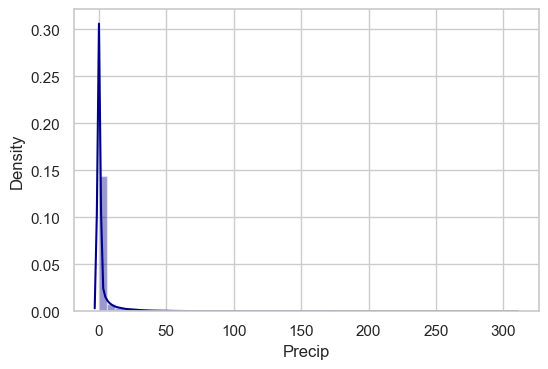

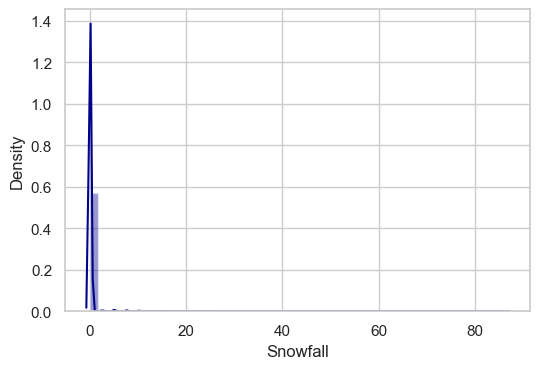

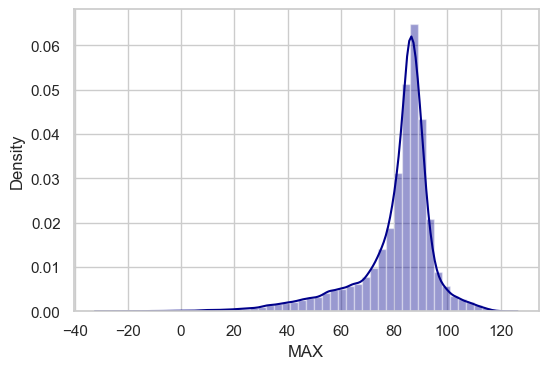

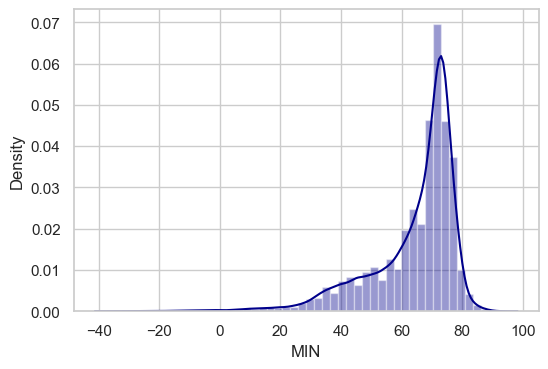

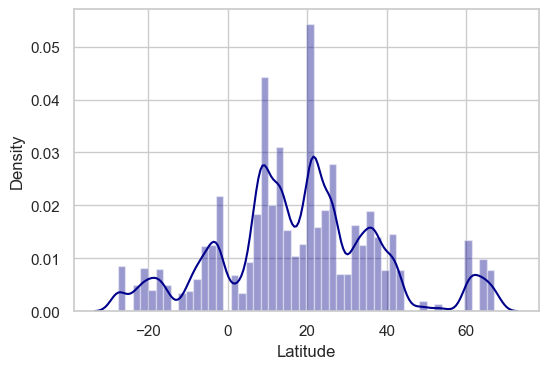

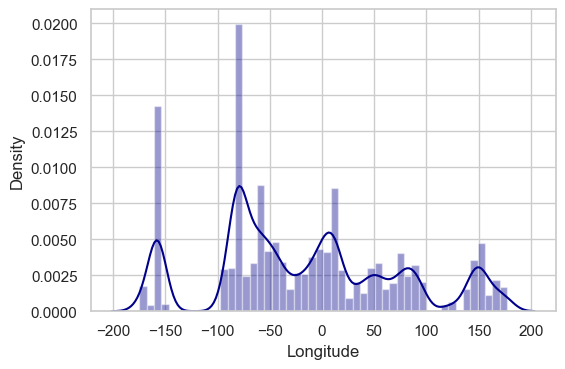

In [37]:
# Density Plots for Numerical Columns
numeric_columns = combined_data.select_dtypes(include=['float64']).columns

for i, col in enumerate(combined_data.select_dtypes(include=['float64']).columns):
    plt.figure(i)
    sns.distplot(combined_data[col], hist=True, kde=True, color = 'darkblue')

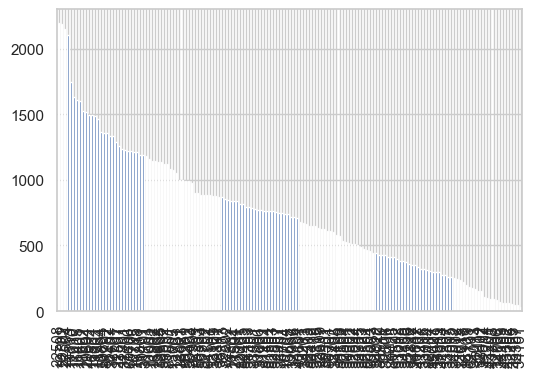

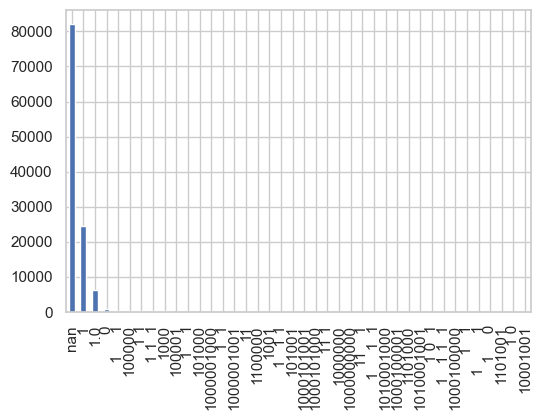

In [38]:
# Barplots for Categorical Data
object_columns = combined_data.select_dtypes(include=['object']).columns

for i, col in enumerate(combined_data.select_dtypes(include=['object']).columns):
    plt.figure(i)
    combined_data[col].value_counts().plot(kind='bar')

In [39]:
pd.crosstab(combined_data.YR, combined_data.MO)

MO,1,2,3,4,5,6,7,8,9,10,11,12
YR,,,,,,,,,,,,
40,93,144,155,149,155,150,155,155,150,155,157,146
41,178,163,181,180,150,147,184,276,327,341,385,436
42,449,412,465,531,637,606,818,860,968,1093,1132,1315
43,1445,1343,1571,1647,2008,2042,2108,2412,2363,2535,2596,2891
44,3048,2982,3228,3188,3299,3298,3425,3389,3221,3390,3285,3401
45,3441,3063,3581,3503,3561,3265,3177,3048,2720,2584,2489,2477


In [40]:
feature_data = combined_data[['Date', 'NAME', 'MIN', 'MAX']]
feature_data.to_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/02_intermediate/feature_data.csv')

In [41]:
feature_data.NAME.value_counts()

WHEELER/AFB 810.1         2192
BALBOA/ALBROOK            2185
MOLOKAI/AP 524            2152
HICKAM/AFB                2101
SAN JOSE                  1916
                          ... 
OSAKA                       60
OKINAWA/RYUKYU ISLANDS      50
WHEELUS                     47
TACHIKAWA                   46
AMENDOLA/MU 9               31
Name: NAME, Length: 152, dtype: int64

In [42]:
ridge_data = feature_data.query("NAME == 'WHEELER/AFB 810.1'")
ridge_data = ridge_data.drop('NAME', axis=1)
ridge_data['Date'] = ridge_data['Date'].astype('datetime64')
ridge_data['Month'] = ridge_data['Date'].dt.month_name()

ridge_data = ridge_data.reset_index()

In [43]:
cat_month = CategoricalDtype(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December']
)

ridge_data['Month'] = ridge_data['Month'].astype(cat_month)

ridge_data.dtypes

index             int64
Date     datetime64[ns]
MIN             float64
MAX             float64
Month          category
dtype: object

<Figure size 600x400 with 0 Axes>

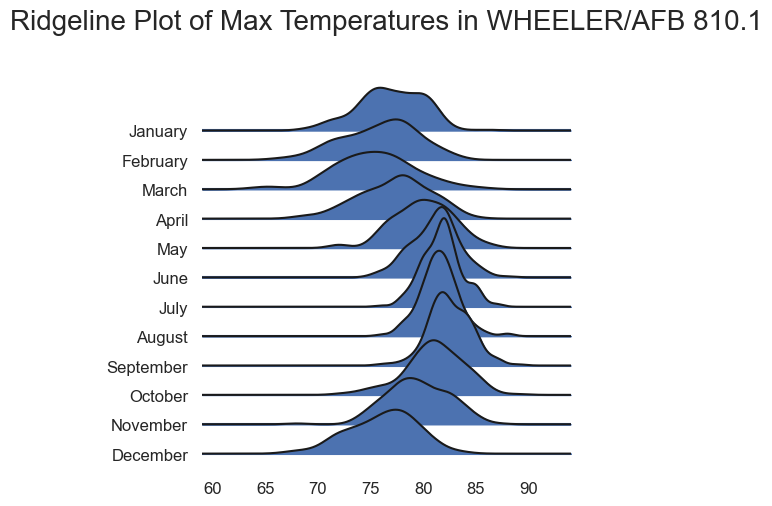

In [44]:
plt.figure()

joyplot(
    data=ridge_data[['MAX', 'Month']], 
    by='Month',
    figsize=(5, 5)
)

plt.title('Ridgeline Plot of Max Temperatures in WHEELER/AFB 810.1', fontsize=20)
plt.show()

<Figure size 600x400 with 0 Axes>

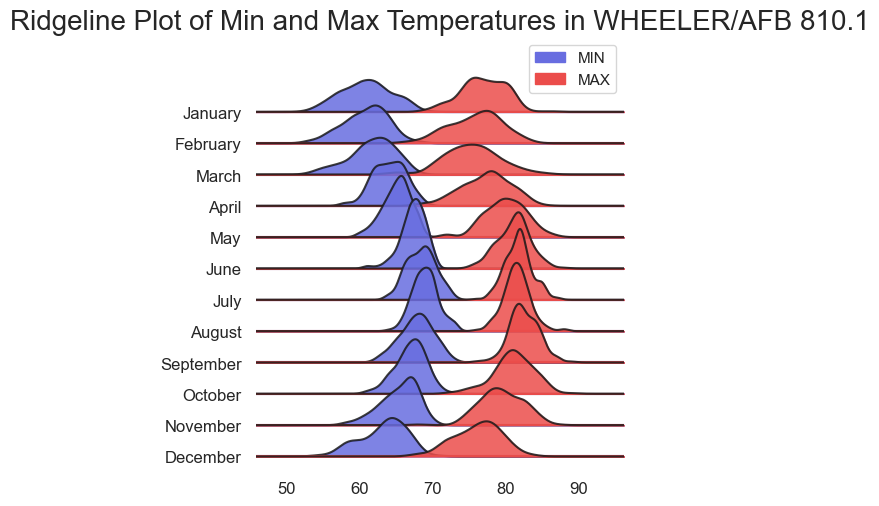

In [45]:
plt.figure()

ax, fig = joyplot(
    data=ridge_data[['MIN', 'MAX', 'Month']], 
    by='Month',
    column=['MIN', 'MAX'],
    color=['#686de0', '#eb4d4b'],
    legend=True,
    alpha=0.85,
    figsize=(5, 5)
)
plt.title('Ridgeline Plot of Min and Max Temperatures in WHEELER/AFB 810.1', fontsize=20)
plt.show()

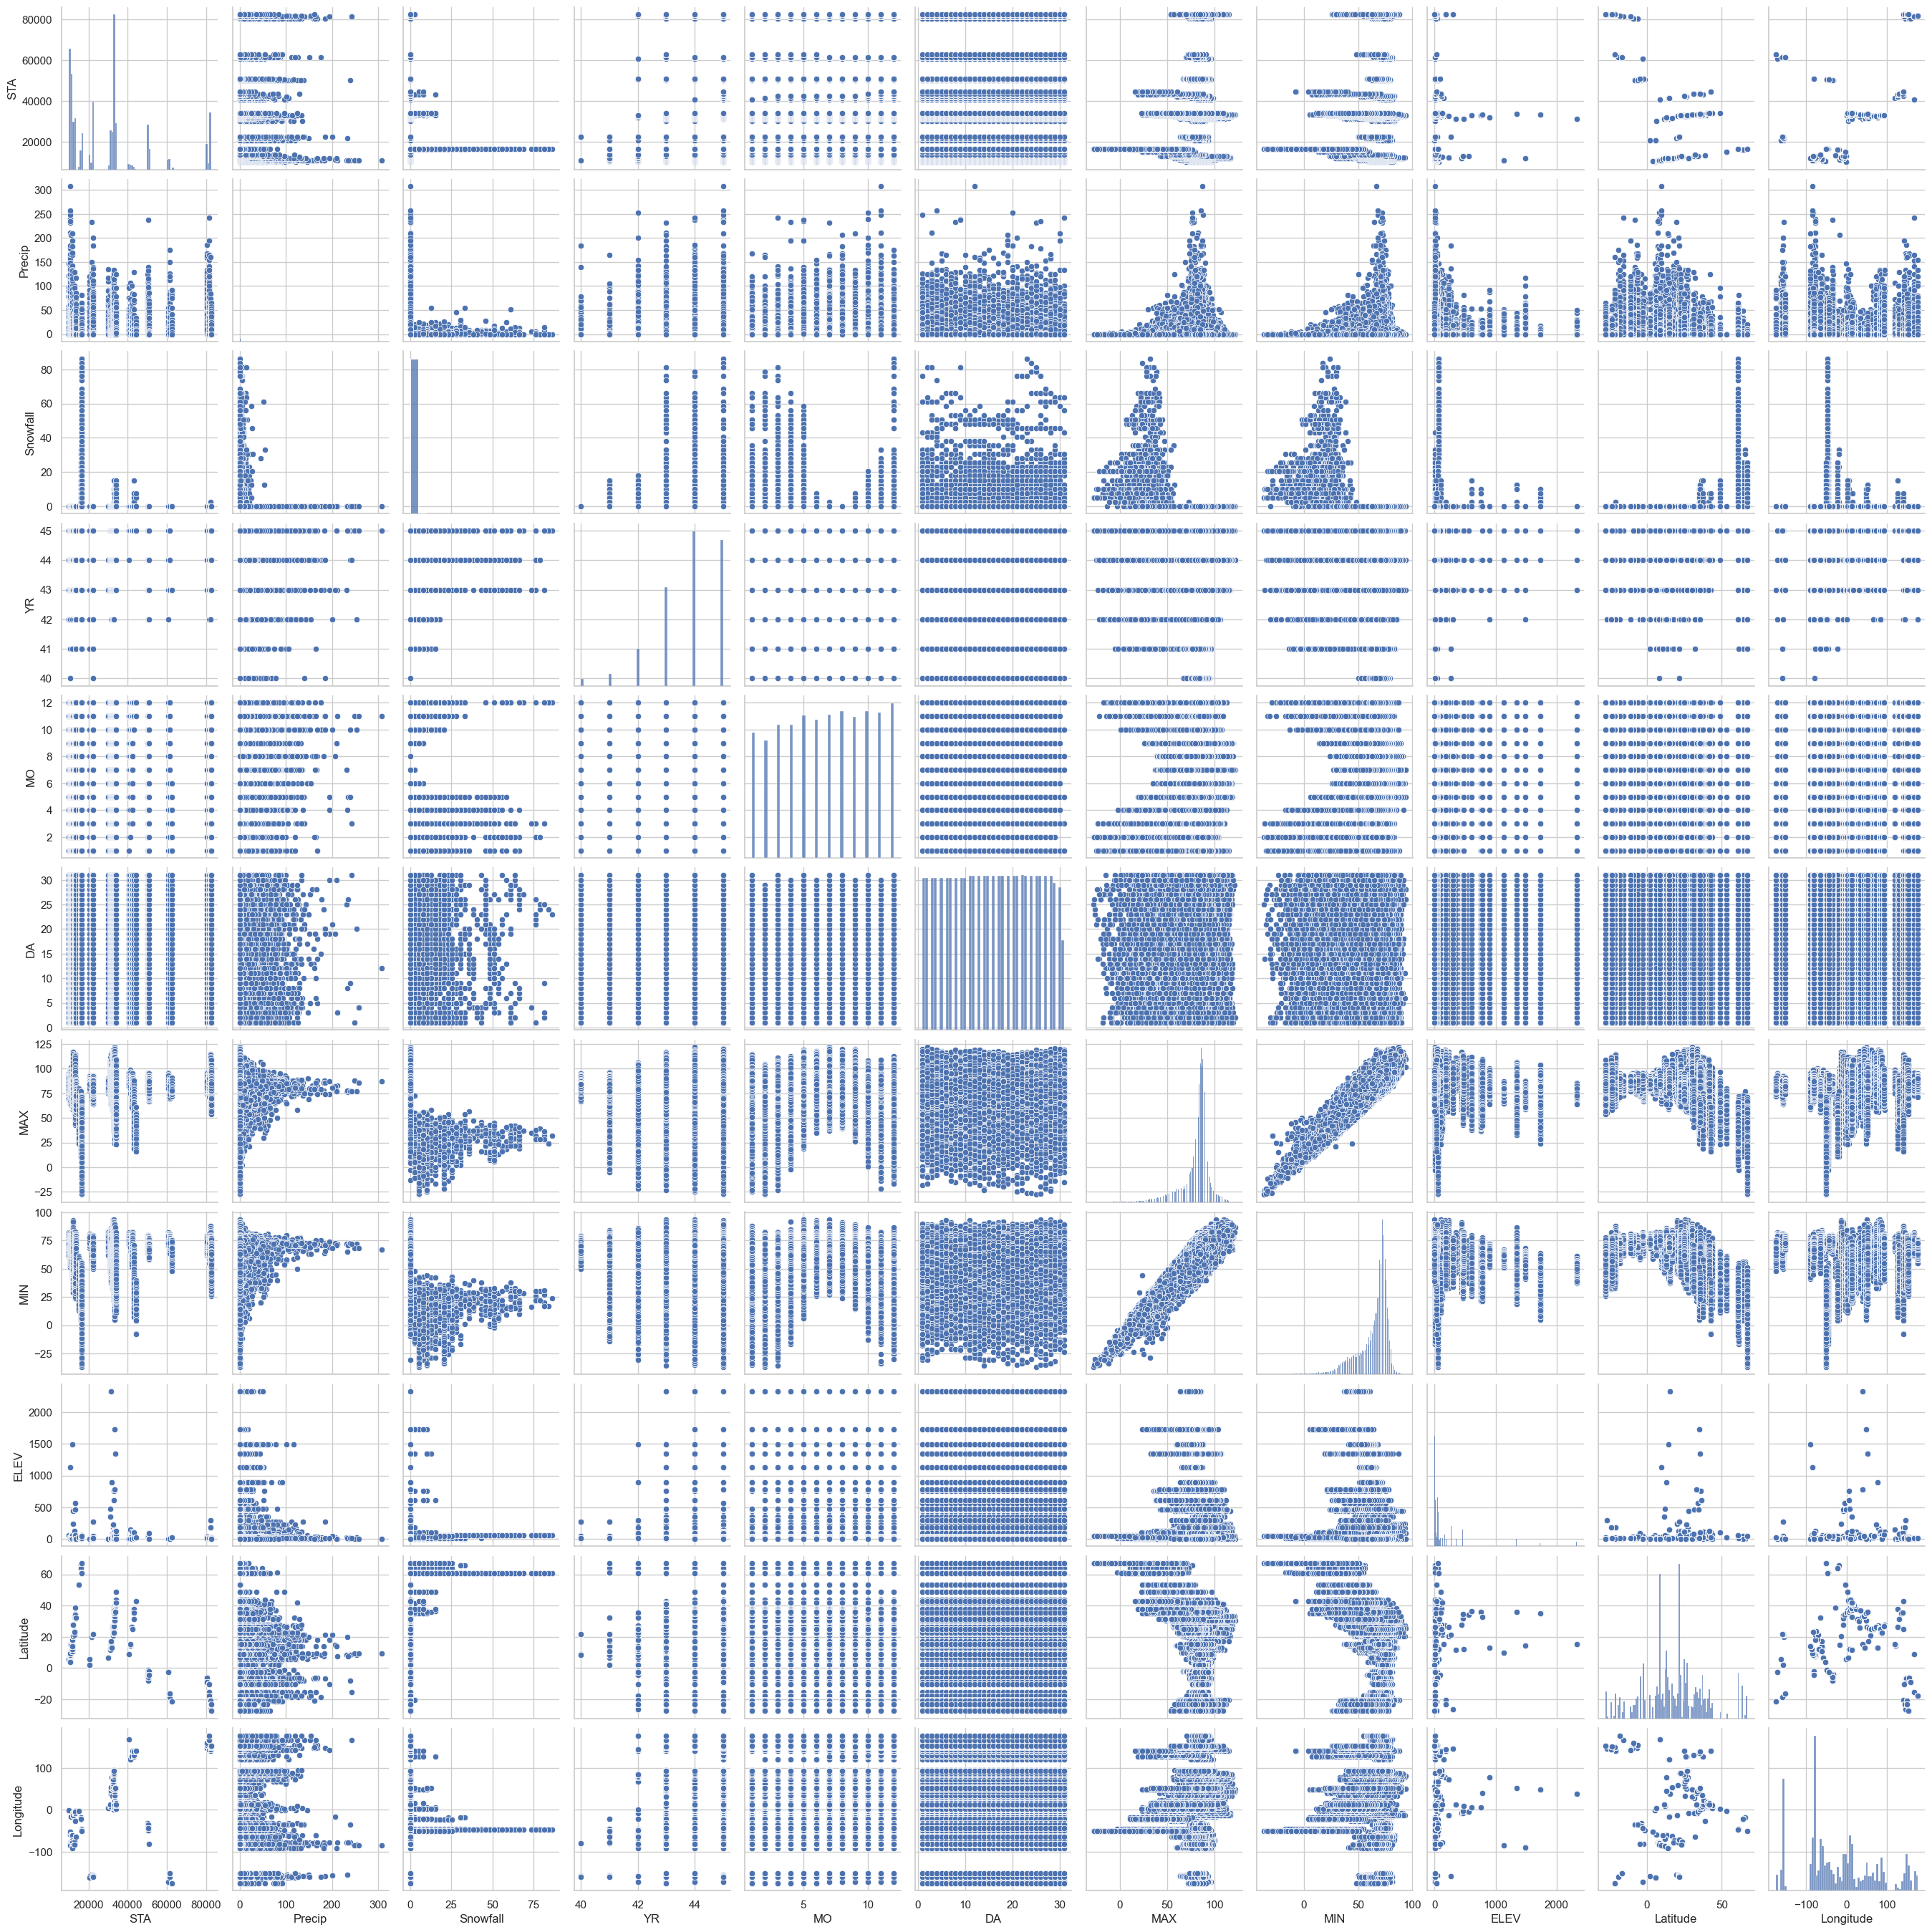

In [46]:
sns.pairplot(combined_data)

In [47]:
ridge_data.to_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/02_intermediate/ridge_data.csv')
combined_data.to_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/02_intermediate/combined_data.csv')

### Specific Research Questions
- Data Integrity Preprocessing Steps
    - What defines the feature 'poor weather' conditions? It looks as if this variable as been corrupted
    - Is there a relationship between the daily minimum and maximum temperature (TimeSeries Analysis)? Yes
    - It is expected that average temperatures are colder in winter months than summer months. Confirmed
    - It is expected that more snowfall occurs in the winter months (for northern hemisphere regions). Confirmed
    - It is expected that more Precipitation occurs in the winter months (for northern hemisphere). The results show on average more Precipitation occurs in the summer. Thisis negligible and extra analysis should split this further per region or by splitting Northern and Southern Hemisphere
    - It is expected that higher levels above the sea have greater precipation. The data shows that as ELEV increased the Precip decreases.
    - Have the years tended to get warmer on average?

In [48]:
combined_data.columns

Index(['STA', 'Date', 'Precip', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA',
       'MAX', 'MIN', 'NAME', 'STATE/COUNTRY ID', 'ELEV', 'Latitude',
       'Longitude'],
      dtype='object')

In [49]:
poor_weather_data = combined_data[['PoorWeather', 'Precip', 'Snowfall', 'MIN', 'MAX', 'ELEV']]
poor_weather_data.PoorWeather.value_counts()

nan           82062
1             24571
1.0            6134
0               869
1     1         310
100000          263
1 1             133
1 1  1           96
1000             90
100001           62
1    1           56
101000           56
1000001000       52
1  1             49
1000001001       45
11               39
1100000          16
1001             16
1   1 1          14
101001           14
1000101001       13
1000101000        9
11 1              8
1000000           7
1000000000        6
11    1           5
1     1  1        5
1010001000        5
1000100001        2
1101000           2
1010001001        2
1 0  1            2
1   1 1  1        2
1000100000        1
1   1             1
1        1        1
1     0           1
1101001           1
1 0               1
10001001          1
Name: PoorWeather, dtype: int64

In [50]:
def winter_month_comparison(data, col):    
    
    return print(data[(data.MO == 1) | (data.MO == 11) | (data.MO == 12)][col].describe())

def summer_month_comparison(data, col):    
    
    return print(data[(data.MO == 6) | (data.MO == 7) | (data.MO == 8)][col].describe())

In [51]:
winter_month_comparison(combined_data, "MIN")
print("""""")
winter_month_comparison(combined_data, "MAX")

count    29364.000000
mean        59.549414
std         16.820875
min        -35.000000
25%         50.000000
50%         65.000000
75%         72.000000
max         88.000000
Name: MIN, dtype: float64

count    29364.000000
mean        76.049653
std         16.994839
min        -25.000000
25%         70.000000
50%         83.000000
75%         87.000000
max        115.000000
Name: MAX, dtype: float64


In [52]:
# Summer Months 
summer_month_comparison(combined_data, "MIN")
print("""""")
summer_month_comparison(combined_data, "MAX")

count    29515.000000
mean        68.834017
std         10.544423
min         24.000000
25%         66.000000
50%         72.000000
75%         75.000000
max         94.000000
Name: MIN, dtype: float64

count    29515.000000
mean        85.196375
std         11.195639
min         35.000000
25%         82.000000
50%         86.000000
75%         90.000000
max        122.000000
Name: MAX, dtype: float64


In [53]:
# Winter Months
winter_month_comparison(combined_data, "Snowfall")
print("""""")
# Summer Months
summer_month_comparison(combined_data, "Snowfall")

count    29364.000000
mean         0.389944
std          3.011202
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         86.360000
Name: Snowfall, dtype: float64

count    29515.00000
mean         0.00284
std          0.12278
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          7.62000
Name: Snowfall, dtype: float64


In [54]:
# Winter Months
winter_month_comparison(combined_data, "Precip")
print("""""")
# Summer Months
summer_month_comparison(combined_data, "Precip")

count    29364.000000
mean         2.630886
std          9.641273
min          0.000000
25%          0.000000
50%          0.000000
75%          0.508000
max        307.340000
Name: Precip, dtype: float64

count    29515.000000
mean         3.588831
std         11.015453
min          0.000000
25%          0.000000
50%          0.000000
75%          1.270000
max        231.648000
Name: Precip, dtype: float64


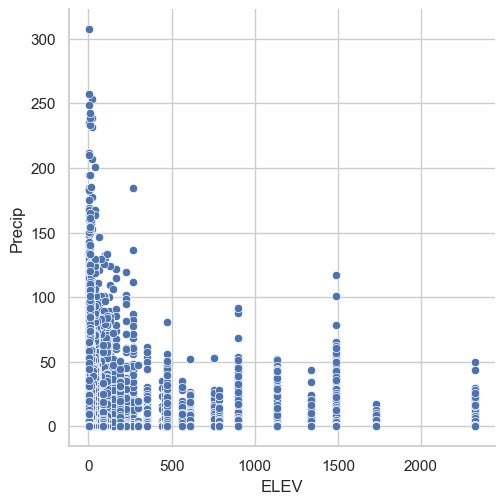

In [55]:
sns.relplot(x="ELEV", y="Precip", data=combined_data);

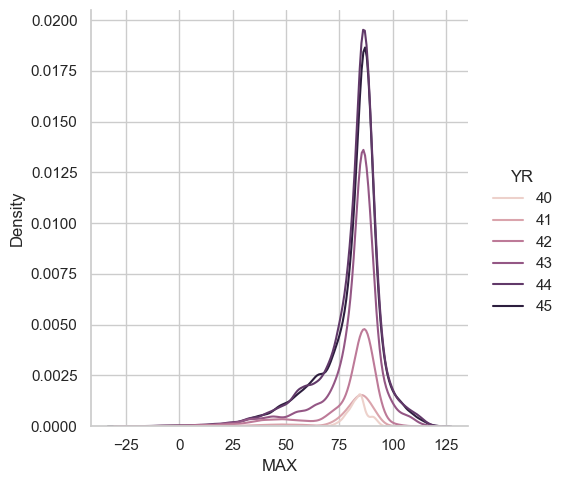

In [56]:
# Have the years tended to get warmer on average?
sns.displot(combined_data, x="MAX", hue="YR", kind="kde")

### Data represents logical coherence
- Check that US countries are all in US states
<pd.crosstab(combined_data["STATE/COUNTRY ID"], combined_data["NAME"])>
- Check max and min temperature are values that exist 
- Check Snowfall is sensible
- Check ELEV against Latitude & Longitude

### Data Cleaning - Feature Engineering
- Deal with date columns. There are 4 most common methods to transform date to numeric format:
    - Unix timestamp: Time since 1970 (not applicable as our data is from period 1940 - 1944
    - KSP date formate: Year and quarter are obvious and attempts to retain similar intervals
    - Divide into several features (DA / MO / YR): Data already formated to accommodate these features
    - Manual Feature Creation: Time from or to an event
- Feature Creation:
    - Northern/Southern Hemisphere Flag
    - Binary Flag for univariate outliers
    - Create sensible bins for numerical Variables
    - Sine & Cos features (out of scope)
    - Average temperature per month/per quarter
- Normalization and standardization of features: Precip/Snowfall/SNF/ELEV <br>

**Date Time Features** <br>
Note: From there analysis it is clear that some areas from both the northern and southern hemisphere have been included as part of the research so care should be taken when dealing with datetime features

In [57]:
def to_ksp_format(datetime):
    year = datetime.year
    day_from_jan_1 = (datetime - dt.datetime(year, 1, 1)).days
    is_leap_year = int(calendar.isleap(year))
    
    return year + (day_from_jan_1 - 0.5) / (365 + is_leap_year)

model_data['ksp_date'] = model_data['Date'].apply(to_ksp_format)

In [58]:
# Calculate the average based on the fahrenheit columns
model_data['MeanTemp_F'] = (model_data['MAX'] + combined_data['MIN'])/2

# Create a simplier binary feature for snowfall occurrence
model_data['Snowfall_bin'] =  np.where(model_data.Snowfall.isnull(), 0, 1)

**Bivariate Combinations**

In [59]:
model_data = model_data.dropna()

y_train = model_data[['MAX']]
X_train_int = model_data[['Precip', 'Snowfall', 'YR', 'MO', 'DA', 'MIN', 'ELEV', 'ksp_date']]

columns_list = X_train_int.columns
interactions = list(combinations(columns_list, 2))

interaction_dict = {}
for interaction in interactions:
    X_train_int['int'] = X_train_int[interaction[0]] * X_train_int[interaction[1]]
    interaction_model = LinearRegression(normalize=True)
    interaction_model.fit(X_train_int, y_train)
    interaction_dict[interaction_model.score(X_train_int, y_train)] = interaction

top_5 = sorted(interaction_dict.keys(), reverse = True)[:5]
for interaction in top_5:
    print(interaction_dict[interaction])

('MIN', 'ELEV')
('Precip', 'MIN')
('Precip', 'ELEV')
('YR', 'ksp_date')
('MIN', 'ksp_date')


In [60]:
model_data["MIN_ELEV"] = model_data.MIN*model_data.ELEV
model_data["Precip_MIN"] = model_data.Precip*model_data.MIN
model_data["Precip_ELEV"] = model_data.Precip*model_data.ELEV
model_data["YR_ksp_date"] = model_data.YR*model_data.ksp_date
model_data["MIN_ksp_date"] = model_data.MIN*model_data.ksp_date

**Polynominal Features**

In [61]:
poly_dict = {}
poly_X_train_int = model_data[['Precip', 'Snowfall', 'YR', 'MO', 'DA', 'MIN', 'ELEV', 'ksp_date']]
for feature in poly_X_train_int.columns:
    for p in range(2, 5):
        X_train_poly = poly_X_train_int
        X_train_poly['sq'] = X_train_poly[feature]**p
        lr = LinearRegression(normalize=True)
        lr.fit(X_train_poly, y_train)
        poly_dict[lr.score(X_train_poly, y_train)] = [feature, p]

poly_dict[max(poly_dict.keys())]

['MIN', 4]

**Add Noisy Features**

In [62]:
model_data["Normal_Noise"] = np.random.normal(0,1,len(model_data))
model_data["Log_Normal_Noise"] = np.random.lognormal(0, 1, len(model_data))

### Feature Scaling & Normalisation

- The point of normalization is to change your observations so that they can be described as a normal distribution.

In [63]:
columns = ['Precip', 'Snowfall', 'MAX', 'MIN', 'ksp_date']
#columns = ['Precip', 'Snowfall']

for i in columns:
    print(i)
    col_name = str(i) + '_normalised'
    print(col_name)
    model_data.loc[:, col_name] = preprocessing.normalize(model_data[[i]])    
    

for i in columns:
    print(i)
    col_name = str(i) + '_min_max_scale'
    print(col_name)
    scaler = MinMaxScaler()
    scaler.fit(model_data[[i]])
    model_data.loc[:, col_name] = scaler.transform(model_data[[i]])
    
    
# for i in columns:
#     print(i)
#     col_name = str(i) + '_boxcox'
#     print(col_name)
#     combined_data.loc[:, col_name] = stats.boxcox(combined_data[i]**2 + 1)

Precip
Precip_normalised
Snowfall
Snowfall_normalised
MAX
MAX_normalised
MIN
MIN_normalised
ksp_date
ksp_date_normalised
Precip
Precip_min_max_scale
Snowfall
Snowfall_min_max_scale
MAX
MAX_min_max_scale
MIN
MIN_min_max_scale
ksp_date
ksp_date_min_max_scale


In [64]:
# Write clean data to 02_intermediate data folder
model_data.to_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/03_processed/model_data.csv')
model_data.to_pickle('/Users/Rej1992/Documents/GitHub/RegressionModels/data/03_processed/model_data.pkl')

## Model Building 
- Data partitioning into training, validation and testing sets (set seed)
    - Ensure that the range of the test is within the range of the train 
- Select the model that you would like to use
    - Linear Regression
    - Polynominal Regression
    - Ridge Regression
    - Lasso Regression
- Hyperparameter tuning is used to fine-tune the model in order to prevent overfitting 
    - This is done implicity for Ridge and Lasso Regression when trying to establish the optimal value for lambda
- Cross-validation is performed to ensure the model performs well on the validation set 
- Model is applied to the test data set
- Save the trained model to a pickle file 
- Create a learning curve & Assess model bias and variance to deduce model improvement next steps

### Linear Regression Models
- Normalizing the inputs is generally a good idea in every type of regression
- Optimal alpha can be determined by cross validation
- Regularizing the intercept is not a good idea and it should be left out of regularization
- Negative R-sq can occurs and is not a bug (as in the case of Lasso Model)

In [65]:
model_data = pd.read_pickle(r'/Users/Rej1992/Documents/GitHub/RegressionModels/data/03_processed/model_data.pkl')
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115022 entries, 0 to 119039
Data columns (total 96 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   STA                     115022 non-null  object        
 1   Date                    115022 non-null  datetime64[ns]
 2   Precip                  115022 non-null  float64       
 3   Snowfall                115022 non-null  float64       
 4   PoorWeather             115022 non-null  object        
 5   YR                      115022 non-null  int64         
 6   MO                      115022 non-null  int64         
 7   DA                      115022 non-null  int64         
 8   MAX                     115022 non-null  float64       
 9   MIN                     115022 non-null  float64       
 10  NAME                    115022 non-null  category      
 11  STATE/COUNTRY ID        115022 non-null  category      
 12  ELEV                    115022

In [66]:
feature_columns = ['Precip', 'Precip_normalised', 'Precip_min_max_scale', 'Snowfall', 'YR', 'MO', 'DA', 'MAX', 'MIN', 'ELEV', "Normal_Noise", "Log_Normal_Noise"]
model_data.corr().loc[feature_columns, 'MAX'].sort_values(ascending=False).head(15)

MAX                     1.000000
MIN                     0.875380
MO                      0.036187
YR                      0.011276
Precip_min_max_scale    0.005561
Precip                  0.005561
Normal_Noise            0.000160
Log_Normal_Noise       -0.000417
DA                     -0.003521
ELEV                   -0.057549
Precip_normalised      -0.062904
Snowfall               -0.340857
Name: MAX, dtype: float64

In [67]:
def _create_model_baseline(data):
    
    return data[['MIN', 'Snowfall', 'MAX']]    


def remove_category_columns(data):
    
    return data.loc[:, ~data.columns.str.startswith('category')].dropna(how='all')


def _create_model_saturated(data):
    
    return data.drop(['STA', 'Date', 'PoorWeather', 'NAME', 'STATE/COUNTRY ID'], axis=1)


def viz_polymonial(x_train, x_test):
    
    plt.scatter(x_train, x_test, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(x_train)), color='blue')
    plt.title('Polynominal Regression)')
    plt.xlabel('Minimum Temperature')
    plt.ylabel('Maximum Temperature')
    plt.show()

    return


def _save_model_to_pickle(model, model_type):
    filename = dt.datetime.now().strftime('%Y-%m-%d')+'_'+model_type+'_finalized_regression_model.pkl'
    pickle.dump(model, open('/Users/Rej1992/Documents/GitHub/RegressionModels/data/04_models/'+filename, 'wb'))


def _regression_models(data, model_type, split = 1/5, alpha = 0.1, folds = 10):
    
    # Establish Target and Predictor Variables
    y = data['MAX']
    X = data.drop(['MAX'], axis=1)  
    
    # Split the data into train and test splits
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=1)
    
    # Check Regression Target Range
    #print(y_train.describe())
    #print("""""")
    #print(y_test.describe())
    
    # Check respective models
    if(model_type == 'LinearRegression'):
        # normalize=True: the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm
        regressor = LinearRegression(normalize=True) 
        
    elif(model_type == 'Polynominal'):
        poly_reg = PolynomialFeatures(degree = 4) # Determined from **Polynominal Features** section
        x_train = poly_reg.fit_transform(x_train.MIN.values.reshape(-1, 1))
        x_test = poly_reg.fit_transform(x_test.MIN.values.reshape(-1, 1))
        regressor = LinearRegression()    
        
    elif(model_type == 'Ridge'):
        regressor = Ridge(alpha = alpha, normalize = True)
        
    elif(model_type == 'Lasso'):
        # Phenomenon of most of the coefficients being zero is called ‘sparsity‘
        # The gradient is not defined as the absolute function is not differentiable at x=0
        regressor = Lasso(alpha = alpha, normalize = True, max_iter=1e5)
        
    elif(model_type == 'Robust'):
        regressor = HuberRegressor()
    
    # Fit the model to the training data
    regressor.fit(x_train, y_train)
    
    # Neatly output the model coefficients 
    if(model_type != 'Polynominal'):
        coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
        print(coefficients)

    # Make Model Predictions on both the training and test set
    y_pred_train = regressor.predict(x_train)
    y_pred_test = regressor.predict(x_test)

    # prepare the cross-validation procedure
    cv = KFold(n_splits=folds, random_state=1, shuffle=True)
            
    # Evaluate model performance on training and test set
    scores_train = cross_val_score(regressor, x_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
    scores_test = cross_val_score(regressor, x_test, y_test, scoring='r2', cv=cv, n_jobs=-1)
    
    # Report performance on training and test data 
    print('Training Accuracy: %.3f (%.3f)' % (mean(scores_train), std(scores_train)))
    print('Testing Accuracy: %.3f (%.3f)' % (mean(scores_test), std(scores_test)))
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_train = r2_score(y_train, y_pred_train)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)
    
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))
    
    print("\n")
    
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))
    
    
    # Residual Diagnoistics
    residuals = pd.DataFrame({'actuals':y_train, 'predicted':y_pred_train})
    
    #Return the result in pre-defined format
    residuals_train = (y_train - y_pred_train)
    residuals_test = (y_test - y_pred_test)
    
    rss = sum((y_pred_train-y_train)**2)
    ret = [regressor.intercept_]
    ret.extend(regressor.coef_)
    
    #Return p_value, std_err -- Extra Work
    
    # Save Model to Pickle
    _save_model_to_pickle(regressor, model_type)
    
    return regressor, x_train, y_train, scores_train, scores_test, residuals, rss, ret, x_test, y_test


# def _load_model_from_pickle(filename, baseline_data[1], baseline_data[3]):
#     loaded_model = pickle.load(open(filename, 'rb'))
#     result = loaded_model.score(x_test, y_test)
    
#     return result

In [68]:
baseline_data = _create_model_baseline(model_data)
baseline_data = baseline_data.dropna(how='all')

In [69]:
# Compare the distribution between the train and test dataset
# Sweetviz notes: Only supports numeric & boolean targets currently
# Split the data into train and test splits
x_train, x_test, y_train, y_test = train_test_split(baseline_data, baseline_data['MAX'], test_size=1/5, random_state=1)

my_report_train_test = sv.compare([x_train, "Train"], [x_test, "Test"], "MAX")
my_report_train_test.show_html(filepath='/Users/Rej1992/Documents/GitHub/RegressionModels/results/Train_Test_Report.html') # Not providing a filename will default to SWEETVIZ_REPORT.html


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [70]:
_regression_models(baseline_data, 'LinearRegression', split = 1/5, alpha = 0.1, folds = 10)

          0         0
0       MIN  0.879873
1  Snowfall -0.385051
Training Accuracy: 0.770 (0.009)
Testing Accuracy: 0.769 (0.011)
The model performance for the training set
-------------------------------------------
RMSE of training set is 7.223521312598187
R2 score of training set is 0.7706846856179127


The model performance for the test set
-------------------------------------------
RMSE of test set is 7.178196601354992
R2 score of test set is 0.7692296745068574


(LinearRegression(normalize=True),
          MIN  Snowfall
 42907   31.0     30.48
 6678    74.0      0.00
 29298   78.0      0.00
 88774   19.0      0.00
 8322    75.0      0.00
 ...      ...       ...
 53958   70.0      0.00
 102045  78.0      0.00
 8060    73.0      0.00
 81656   61.0      0.00
 102537  73.0      0.00
 
 [92017 rows x 2 columns],
 42907     43.0
 6678      92.0
 29298     91.0
 88774     47.0
 8322      90.0
           ... 
 53958     85.0
 102045    88.0
 8060      87.0
 81656     78.0
 102537    94.0
 Name: MAX, Length: 92017, dtype: float64,
 array([0.78609308, 0.76444318, 0.75884973, 0.77243368, 0.78075714,
        0.76060121, 0.7651251 , 0.78098629, 0.76799283, 0.7659073 ]),
 array([0.76151096, 0.79525538, 0.77634412, 0.77161872, 0.75090228,
        0.7645347 , 0.77115379, 0.77146443, 0.75780261, 0.76480157]),
         actuals  predicted
 42907      43.0  40.142933
 6678       92.0  89.713816
 29298      91.0  93.233306
 88774      47.0  41.320827
 8322       9

In [71]:
_regression_models(baseline_data, 'Polynominal', split = 1/5, alpha = 0.1, folds = 10)

Training Accuracy: 0.788 (0.008)
Testing Accuracy: 0.786 (0.011)
The model performance for the training set
-------------------------------------------
RMSE of training set is 6.938689451774638
R2 score of training set is 0.7884124823215937


The model performance for the test set
-------------------------------------------
RMSE of test set is 6.900155542764963
R2 score of test set is 0.7867608090275783


(LinearRegression(),
 array([[1.0000000e+00, 3.1000000e+01, 9.6100000e+02, 2.9791000e+04,
         9.2352100e+05],
        [1.0000000e+00, 7.4000000e+01, 5.4760000e+03, 4.0522400e+05,
         2.9986576e+07],
        [1.0000000e+00, 7.8000000e+01, 6.0840000e+03, 4.7455200e+05,
         3.7015056e+07],
        ...,
        [1.0000000e+00, 7.3000000e+01, 5.3290000e+03, 3.8901700e+05,
         2.8398241e+07],
        [1.0000000e+00, 6.1000000e+01, 3.7210000e+03, 2.2698100e+05,
         1.3845841e+07],
        [1.0000000e+00, 7.3000000e+01, 5.3290000e+03, 3.8901700e+05,
         2.8398241e+07]]),
 42907     43.0
 6678      92.0
 29298     91.0
 88774     47.0
 8322      90.0
           ... 
 53958     85.0
 102045    88.0
 8060      87.0
 81656     78.0
 102537    94.0
 Name: MAX, Length: 92017, dtype: float64,
 array([0.80403575, 0.78317061, 0.77794529, 0.79017283, 0.7971223 ,
        0.77910175, 0.78171785, 0.79741639, 0.7868603 , 0.78275197]),
 array([0.77840115, 0.80823482, 0.793242  ,

In [72]:
_regression_models(baseline_data, 'Ridge', split = 1/5, alpha = 0.1, folds = 10)

          0         0
0       MIN  0.794397
1  Snowfall -0.488496
Training Accuracy: 0.764 (0.008)
Testing Accuracy: 0.762 (0.010)
The model performance for the training set
-------------------------------------------
RMSE of training set is 7.321098429872314
R2 score of training set is 0.7644475455481212


The model performance for the test set
-------------------------------------------
RMSE of test set is 7.263136054193859
R2 score of test set is 0.7637359611474176


(Ridge(alpha=0.1, normalize=True),
          MIN  Snowfall
 42907   31.0     30.48
 6678    74.0      0.00
 29298   78.0      0.00
 88774   19.0      0.00
 8322    75.0      0.00
 ...      ...       ...
 53958   70.0      0.00
 102045  78.0      0.00
 8060    73.0      0.00
 81656   61.0      0.00
 102537  73.0      0.00
 
 [92017 rows x 2 columns],
 42907     43.0
 6678      92.0
 29298     91.0
 88774     47.0
 8322      90.0
           ... 
 53958     85.0
 102045    88.0
 8060      87.0
 81656     78.0
 102537    94.0
 Name: MAX, Length: 92017, dtype: float64,
 array([0.7783338 , 0.75866316, 0.75378044, 0.76508478, 0.77360561,
        0.75596382, 0.75901032, 0.77309489, 0.76349501, 0.76016585]),
 array([0.75636268, 0.78737221, 0.76796567, 0.7635556 , 0.74607644,
        0.75846905, 0.76517125, 0.76479703, 0.75306345, 0.7608069 ]),
         actuals  predicted
 42907      43.0  39.838284
 6678       92.0  88.886696
 29298      91.0  92.064282
 88774      47.0  45.194886
 8322       9

In [73]:
_regression_models(baseline_data, 'Lasso', split = 1/5, alpha = 0.1, folds = 10)

          0    0
0       MIN  0.0
1  Snowfall -0.0
Training Accuracy: -0.000 (0.000)
Testing Accuracy: -0.001 (0.001)
The model performance for the training set
-------------------------------------------
RMSE of training set is 15.084552430633517
R2 score of training set is 0.0


The model performance for the test set
-------------------------------------------
RMSE of test set is 14.943314625388457
R2 score of test set is -9.935151120354924e-05


(Lasso(alpha=0.1, max_iter=100000.0, normalize=True),
          MIN  Snowfall
 42907   31.0     30.48
 6678    74.0      0.00
 29298   78.0      0.00
 88774   19.0      0.00
 8322    75.0      0.00
 ...      ...       ...
 53958   70.0      0.00
 102045  78.0      0.00
 8060    73.0      0.00
 81656   61.0      0.00
 102537  73.0      0.00
 
 [92017 rows x 2 columns],
 42907     43.0
 6678      92.0
 29298     91.0
 88774     47.0
 8322      90.0
           ... 
 53958     85.0
 102045    88.0
 8060      87.0
 81656     78.0
 102537    94.0
 Name: MAX, Length: 92017, dtype: float64,
 array([-1.22814783e-04, -1.11200666e-04, -4.15170745e-04, -8.60125429e-04,
        -7.12885008e-05, -3.31586474e-05, -9.05049771e-05, -3.50283249e-04,
        -1.11446872e-04, -1.74821860e-04]),
 array([-1.63328530e-04, -3.16204224e-03, -2.95581426e-04, -1.18098926e-04,
        -3.89678189e-04, -2.59343188e-05, -9.84382988e-06, -1.73721873e-05,
        -1.08293755e-03, -3.21990067e-04]),
         actuals  

In [74]:
saturated_data = remove_category_columns(model_data)
saturated_data = _create_model_saturated(saturated_data)

In [75]:
_regression_models(saturated_data, 'LinearRegression', split = 1/5, alpha = 0.1, folds = 10)

                         0             0
0                   Precip  2.243579e-02
1                 Snowfall -1.358429e-01
2                       YR  5.008736e-13
3                       MO  8.196491e-14
4                       DA  2.625134e-15
5                      MIN -5.899792e-01
6                     ELEV  4.303726e-18
7                 Latitude -7.459542e-17
8                Longitude  2.859162e-17
9                 ksp_date -4.167458e-03
10              MeanTemp_F  3.107899e-01
11            Snowfall_bin -1.390388e+00
12                MIN_ELEV -1.956315e-19
13              Precip_MIN -2.837204e-18
14             Precip_ELEV -3.349074e-18
15             YR_ksp_date  2.448767e-16
16            MIN_ksp_date  5.202468e-17
17            Normal_Noise -2.341490e-15
18        Log_Normal_Noise -3.935018e-17
19       Precip_normalised -3.760805e-15
20     Snowfall_normalised -9.409661e-15
21          MAX_normalised -5.706418e-15
22          MIN_normalised -2.658224e-15
23     ksp_date_

(LinearRegression(normalize=True),
         Precip  Snowfall  YR  MO  DA   MIN  ELEV   Latitude   Longitude  \
 42907    1.016     30.48  44   2   5  31.0     3  65.666667  -18.033333   
 6678     0.000      0.00  41   1  24  74.0     9   8.966667  -79.500000   
 29298    0.000      0.00  43   3  10  78.0    63  12.133333  -86.233333   
 88774    0.000      0.00  45   2  17  19.0  1727  34.850000   48.600000   
 8322    24.638      0.00  45   8   2  75.0     9   8.966667  -79.500000   
 ...        ...       ...  ..  ..  ..   ...   ...        ...         ...   
 53958    0.000      0.00  44   7   5  70.0    42  21.150000 -157.033333   
 102045   0.000      0.00  43   5  24  78.0    47  -2.583333  -44.233333   
 8060    18.796      0.00  44  11  13  73.0     9   8.966667  -79.500000   
 81656    0.000      0.00  43   6  23  61.0    88  35.616667    0.583333   
 102537   0.000      0.00  44   9  29  73.0    47  -2.583333  -44.233333   
 
            ksp_date  ...  Precip_normalised  Snowf

In [76]:
_regression_models(saturated_data, 'Ridge', split = 1/5, alpha = 0.1, folds = 10)

                         0          0
0                   Precip  -0.005387
1                 Snowfall  -0.013708
2                       YR   0.027424
3                       MO  -0.022331
4                       DA  -0.001138
5                      MIN   0.029711
6                     ELEV   0.000165
7                 Latitude  -0.006364
8                Longitude   0.004192
9                 ksp_date   0.009216
10              MeanTemp_F   0.319777
11            Snowfall_bin   0.000000
12                MIN_ELEV   0.000023
13              Precip_MIN   0.000048
14             Precip_ELEV  -0.000027
15             YR_ksp_date   0.000014
16            MIN_ksp_date   0.000015
17            Normal_Noise  -0.004457
18        Log_Normal_Noise   0.000827
19       Precip_normalised  -1.032920
20     Snowfall_normalised  -1.743286
21          MAX_normalised   1.070229
22          MIN_normalised  -0.048651
23     ksp_date_normalised   0.000000
24    Precip_min_max_scale  -1.655771
25  Snowfall

(Ridge(alpha=0.1, normalize=True),
         Precip  Snowfall  YR  MO  DA   MIN  ELEV   Latitude   Longitude  \
 42907    1.016     30.48  44   2   5  31.0     3  65.666667  -18.033333   
 6678     0.000      0.00  41   1  24  74.0     9   8.966667  -79.500000   
 29298    0.000      0.00  43   3  10  78.0    63  12.133333  -86.233333   
 88774    0.000      0.00  45   2  17  19.0  1727  34.850000   48.600000   
 8322    24.638      0.00  45   8   2  75.0     9   8.966667  -79.500000   
 ...        ...       ...  ..  ..  ..   ...   ...        ...         ...   
 53958    0.000      0.00  44   7   5  70.0    42  21.150000 -157.033333   
 102045   0.000      0.00  43   5  24  78.0    47  -2.583333  -44.233333   
 8060    18.796      0.00  44  11  13  73.0     9   8.966667  -79.500000   
 81656    0.000      0.00  43   6  23  61.0    88  35.616667    0.583333   
 102537   0.000      0.00  44   9  29  73.0    47  -2.583333  -44.233333   
 
            ksp_date  ...  Precip_normalised  Snowf

In [77]:
_regression_models(saturated_data, 'Lasso', split = 1/5, alpha = 0.1, folds = 10)

                         0    0
0                   Precip  0.0
1                 Snowfall -0.0
2                       YR  0.0
3                       MO  0.0
4                       DA -0.0
5                      MIN  0.0
6                     ELEV -0.0
7                 Latitude -0.0
8                Longitude  0.0
9                 ksp_date  0.0
10              MeanTemp_F  0.0
11            Snowfall_bin  0.0
12                MIN_ELEV  0.0
13              Precip_MIN  0.0
14             Precip_ELEV -0.0
15             YR_ksp_date  0.0
16            MIN_ksp_date  0.0
17            Normal_Noise  0.0
18        Log_Normal_Noise  0.0
19       Precip_normalised -0.0
20     Snowfall_normalised -0.0
21          MAX_normalised  0.0
22          MIN_normalised  0.0
23     ksp_date_normalised  0.0
24    Precip_min_max_scale  0.0
25  Snowfall_min_max_scale -0.0
26       MAX_min_max_scale  0.0
27       MIN_min_max_scale  0.0
28  ksp_date_min_max_scale  0.0
Training Accuracy: -0.000 (0.000)
Testin

(Lasso(alpha=0.1, max_iter=100000.0, normalize=True),
         Precip  Snowfall  YR  MO  DA   MIN  ELEV   Latitude   Longitude  \
 42907    1.016     30.48  44   2   5  31.0     3  65.666667  -18.033333   
 6678     0.000      0.00  41   1  24  74.0     9   8.966667  -79.500000   
 29298    0.000      0.00  43   3  10  78.0    63  12.133333  -86.233333   
 88774    0.000      0.00  45   2  17  19.0  1727  34.850000   48.600000   
 8322    24.638      0.00  45   8   2  75.0     9   8.966667  -79.500000   
 ...        ...       ...  ..  ..  ..   ...   ...        ...         ...   
 53958    0.000      0.00  44   7   5  70.0    42  21.150000 -157.033333   
 102045   0.000      0.00  43   5  24  78.0    47  -2.583333  -44.233333   
 8060    18.796      0.00  44  11  13  73.0     9   8.966667  -79.500000   
 81656    0.000      0.00  43   6  23  61.0    88  35.616667    0.583333   
 102537   0.000      0.00  44   9  29  73.0    47  -2.583333  -44.233333   
 
            ksp_date  ...  Preci

In [78]:
# Check linear regression Assumptions
# Linearity --- Error Terms
# Independence --- Error Terms
# Homoscedasticity (constant variance) --- Error Terms
# Normality --- Error Terms
# Multicollinearity --- Predicting Variables

In [79]:
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [80]:
def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def diagnostic_plots(X, y):
    """
    Function to reproduce the 4 base plots of an OLS model in Python.
    --  Inputs:
    X: A numpy array or pandas dataframe of the features to use in building the linear regression model
    y: A numpy array or pandas series/dataframe of the target variable of the linear regression model
    
    model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
    generated from X, y
    """
    model_fit = sm.OLS(y, sm.add_constant(X)).fit()
        
    # create dataframe from X, y for easier plot handling
    dataframe = pd.concat([X, y], axis=1)
    
    # model values
    model_fitted_y = model_fit.fittedvalues
    
    # model residuals
    model_residuals = model_fit.resid
    
    # normalized residuals
    model_norm_residuals = model_fit.get_influence().resid_studentized_internal
    
    # absolute squared normalized residuals
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    
    # absolute residuals
    model_abs_resid = np.abs(model_residuals)
    
    # leverage, from statsmodels internals
    model_leverage = model_fit.get_influence().hat_matrix_diag
    
    # cook's distance, from statsmodels internals
    model_cooks = model_fit.get_influence().cooks_distance[0]
    
    plot_lm_1 = plt.figure()
    plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                                      lowess=True,
                                      scatter_kws={'alpha': 0.5},
                                      line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals');
    
    # annotations
    abs_resid = model_abs_resid.sort_values(ascending=False)
    abs_resid_top_3 = abs_resid[:3]
    for i in abs_resid_top_3.index:
        plot_lm_1.axes[0].annotate(i,
                                   xy=(model_fitted_y[i],
                                       model_residuals[i]));
        
    QQ = ProbPlot(model_norm_residuals)
    
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
    
    # annotations
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]
    for r, i in enumerate(abs_norm_resid_top_3):
        plot_lm_2.axes[0].annotate(i,
                                   xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                       model_norm_residuals[i]));
        
    plot_lm_3 = plt.figure()
    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
    sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
    plot_lm_3.axes[0].set_title('Scale-Location')
    plot_lm_3.axes[0].set_xlabel('Fitted values')
    plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');
    
    # annotations
    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    for i in abs_norm_resid_top_3:
        plot_lm_3.axes[0].annotate(i, xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i]));
        
        
    plot_lm_4 = plt.figure();
    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
    sns.regplot(model_leverage, model_norm_residuals,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
    plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
    plot_lm_4.axes[0].set_ylim(-3, 5)
    plot_lm_4.axes[0].set_title('Residuals vs Leverage')
    plot_lm_4.axes[0].set_xlabel('Leverage')
    plot_lm_4.axes[0].set_ylabel('Standardized Residuals');
    
    # annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
    for i in leverage_top_3:
        plot_lm_4.axes[0].annotate(i,
                                   xy=(model_leverage[i],
                                       model_norm_residuals[i]));
    p = len(model_fit.params) # number of model parameters
    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
          np.linspace(0.001, max(model_leverage), 50),
          'Cook\'s distance') # 0.5 line
    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
          np.linspace(0.001, max(model_leverage), 50)) # 1 line
    plot_lm_4.legend(loc='upper right');

In [81]:
y = saturated_data['MAX']
X = saturated_data.drop(['MAX'], axis=1)  

# Split the data into train and test splits
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=1)

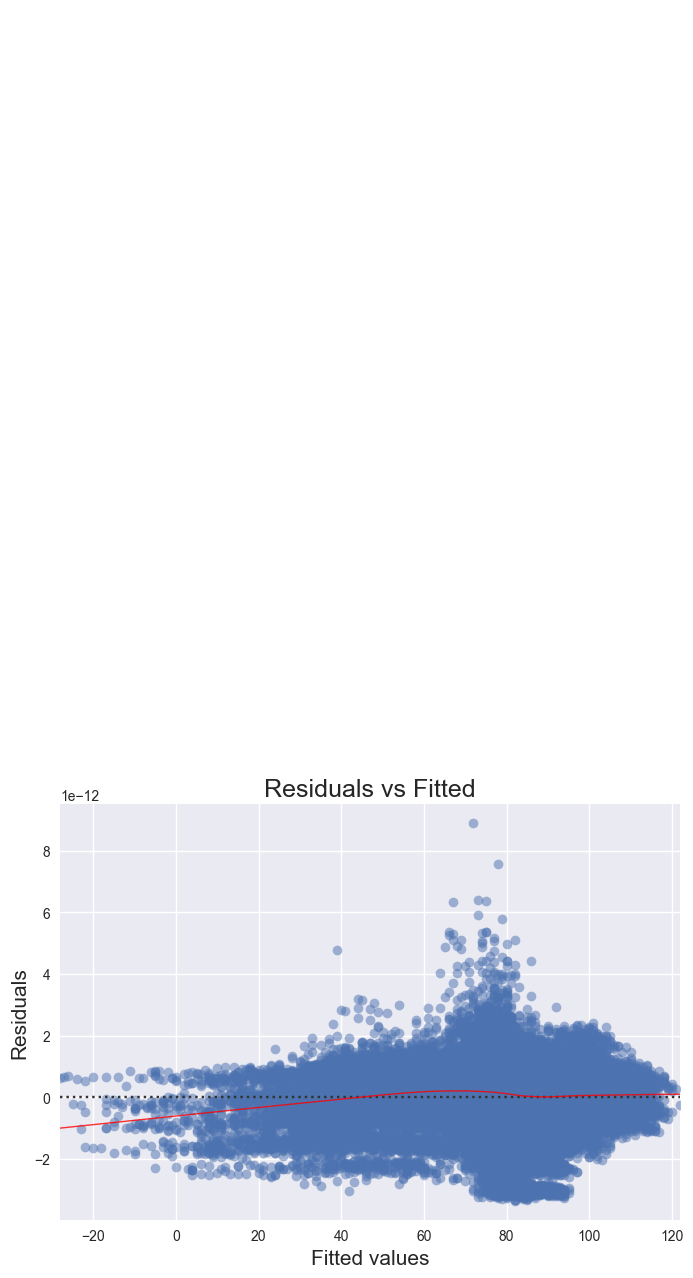

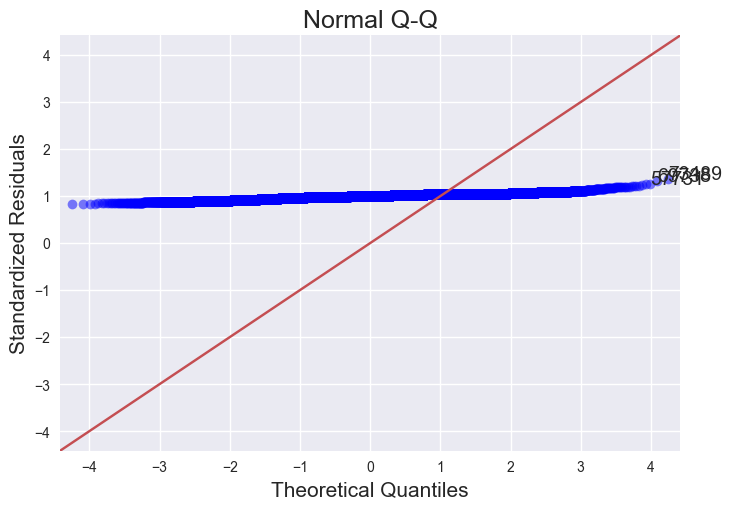

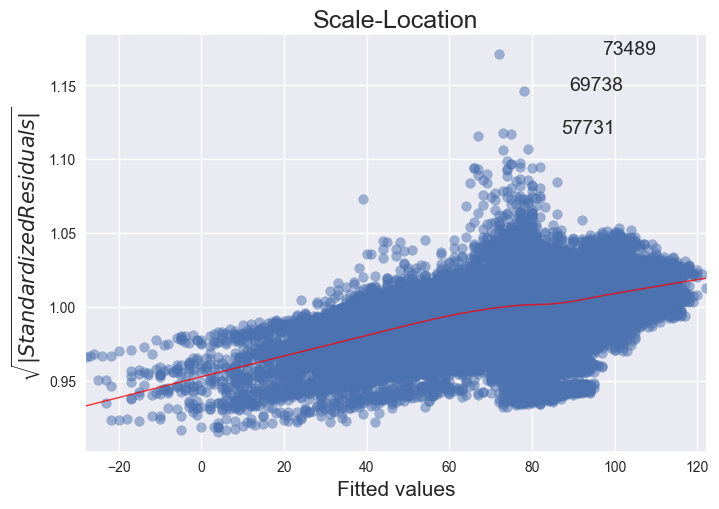

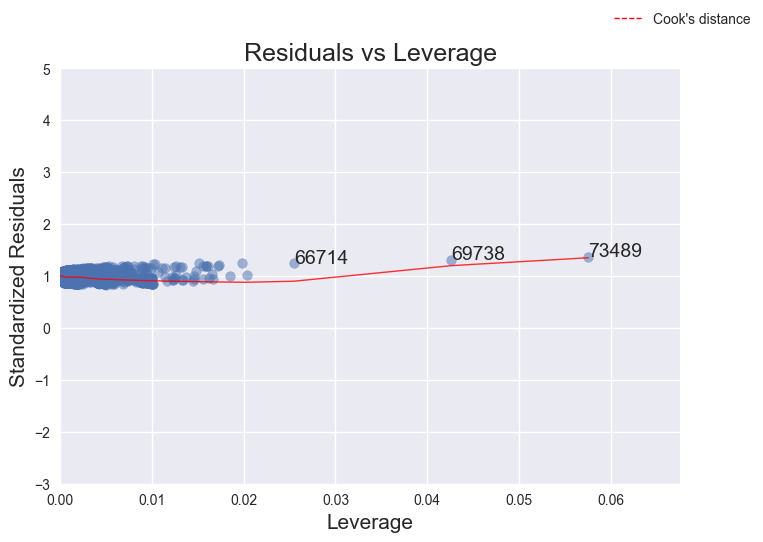

In [82]:
diagnostic_plots(x_train, 
                 y_train)

In [83]:
### Learning Curve Implementation
# https://www.dataquest.io/blog/learning-curves-machine-learning/

# Models have two error scores to monitor: one for the validation set, and one for the training sets. If we plot the 
# evolution of the two error scores as training sets change, we end up with two curves. These are called learning 
# curves. In a nutshell, a learning curve shows how error changes as the training set size increases.

# Learning curves give us an opportunity to diagnose bias and variance in supervised learning models
# learning_curve() to generate the data needed to plot a learning curve. The function returns a tuple containing 
# three elements: the training set sizes, and the error scores on both the validation sets and the training sets

# Adding more training data points won’t lead to significantly better models. If the two curve converge adding more
# data will not improve model performance - A more complex algortihm needs to be applied. Adding more features, 
# however, is a different thing and is very likely to help because it will increase the complexity of our current 
# model.

# The main indicator of a bias problem is a high validation error. If the model fails to fit the training data well, 
# it means it has high bias with respect to that set of data.

# A narrow gap between training and validation curves indicates low variance. If the variance is high, then the model 
# fits training data too well. High training MSE scores are also a quick way to detect low variance
# Polynominal terms should lower the bias by increasing the model’s complexity. If we decrease regularization, 
# the model will fit training data better, and, as a consequence, the variance will increase and the bias will 
# decrease.

# The large gap and the low training error also indicates an overfitting problem. Solve by increasing the 
# regularization or reducing the numbers of features

# The best possible learning curves we can see are those which converge to the value of some irreducible error
# For error metrics that describe how bad a model is e.g. MSE (smaller values equals better model), the irreducible 
# error gives a lower bound: you cannot get lower than that. For error metrics that describe how good a model is, 
# e.g. accuracy (higher values equals better model) the irreducible error gives an upper bound: you cannot get higher 

# For classification the workflow is almost identical. The main difference is that we’ll have to choose another 
# error metric
train_sizes = [250, 
               math.floor(0.001*len(baseline_data)),
               math.floor(0.01*len(baseline_data)),
               math.floor(0.05*len(baseline_data)),
               math.floor(0.075*len(baseline_data)),
               math.floor(0.1*len(baseline_data)),
               math.floor(0.2*len(baseline_data))]
#                math.floor(0.3*len(baseline_data)),
#                math.floor(0.4*len(baseline_data)),
#                math.floor(0.5*len(baseline_data)),
#                math.floor(0.6*len(baseline_data)),
#                math.floor(0.7*len(baseline_data)),
#                math.floor(0.8*len(baseline_data))] # Not advised to go over 80% so sensible proportion of data retained for validation


features = ['Precip',  'Snowfall', 'YR', 'MO', 'DA', 'MIN', 'ELEV', 'Normal_Noise', 'Log_Normal_Noise']
target = 'MAX'

train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression(),
                                                              X = model_data[features].dropna(how='all'),
                                                              y = model_data[target], 
                                                              train_sizes = train_sizes, 
                                                              cv = 10,
                                                              scoring = 'r2',
                                                              shuffle = True)

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[0.88756717 0.76626308 0.76576247 0.69924265 0.81958937 0.80144049
  0.78816036 0.87600218 0.84486816 0.87576525]
 [0.82943589 0.82370114 0.80515    0.66026262 0.84665272 0.8491531
  0.77461451 0.86181737 0.8279065  0.85402723]
 [0.82163703 0.8143152  0.7909024  0.64050084 0.80316628 0.83443068
  0.83302649 0.81836373 0.8080398  0.81031701]
 [0.79877163 0.81164638 0.80190322 0.6366266  0.79578728 0.81675854
  0.79984638 0.79431119 0.80077405 0.80999907]
 [0.7924726  0.80620984 0.80409039 0.63455108 0.79474034 0.81613999
  0.80163178 0.79345265 0.79781478 0.80890384]
 [0.79183058 0.80411955 0.79808883 0.63078322 0.79481456 0.81699872
  0.80037117 0.78951846 0.7927568  0.80642652]
 [0.79105857 0.80267504 0.79918199 0.62698584 0.79642702 0.81200007
  0.79939092 0.79260913 0.79310244 0.80978237]]

 ----------------------------------------------------------------------

Validation scores:

 [[-0.55715075 -0.84580034  0.42158774  0.70045187 -0.58320345  0.09803058
   0.69

In [84]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 115     -0.812466
250     -0.813272
1150    -0.797470
5751    -0.786642
8626    -0.785001
11502   -0.782571
23004   -0.782321
dtype: float64

 --------------------

Mean validation scores

 115     -0.055693
250     -0.115339
1150    -0.156268
5751    -0.165356
8626    -0.155606
11502   -0.157012
23004   -0.171590
dtype: float64


(-0.8, 0.1)

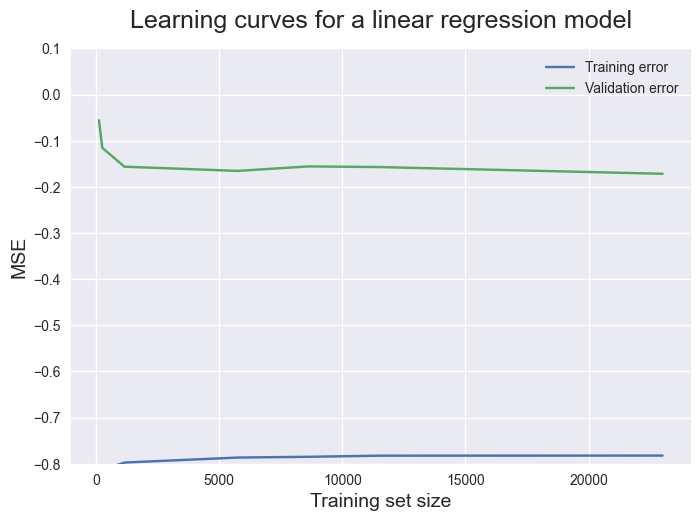

In [85]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(-0.8,0.1)

In [86]:
endtime = dt.time()
endtime - start_time

TypeError: unsupported operand type(s) for -: 'datetime.time' and 'datetime.time'